In [24]:
%matplotlib inline
from __future__ import division
import cvxpy as cvx
import matplotlib.pyplot as plt
import numpy as np

x (600, 2) y (600,)


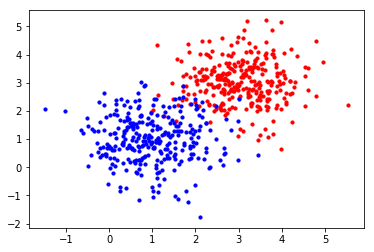

In [25]:
###Data Generation
DIM = 2
COLORS = ['red', 'blue']
# np.random.seed(2)
M1 = np.ones((DIM,))
M2 = 3 * np.ones((DIM,))
C1 = np.diag(0.7 * np.ones((DIM,)))
C2 = np.diag(0.6 * np.ones((DIM,)))
fig, ax = plt.subplots()
def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)
def plot_data_with_labels(ax, x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li], s=10)
NUM = 300
x1 = generate_gaussian(M1, C1, NUM)
y1 = np.ones((x1.shape[0],))
x2 = generate_gaussian(M2, C2, NUM)
y2 = -np.ones((x2.shape[0],))
x = np.concatenate((x1, x2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)
print('x {} y {}'.format(x.shape, y.shape))
plot_data_with_labels(ax, x, y)

In [26]:
import time
start_time = time.time()

# Dual form
alpha = cvx.Variable(2*NUM)
C = cvx.Parameter(value=1.5)
P = (np.diag(y) * np.dot(x,x.T) * np.diag(y))
loss = cvx.sum_entries(alpha) -0.5*cvx.quad_form(alpha, P)
# -0.5*(alpha.T * (cvx.diag(y) * np.dot(x,x.T) * cvx.diag(y)) * alpha)

const = []
for i  in range(2*NUM):
    const.append(0 <= alpha[i])
    const.append(alpha[i] <= C)
const.append(((alpha.T)*y)==0)
prob = cvx.Problem(cvx.Maximize(loss), const)
prob.solve(verbose=True)
# prob.solve(solver="CVXOPT",verbose=True)
end_time = time.time()
print end_time - start_time


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.500e+02  -1.880e+03  +6e+03  3e-01  3e-05  1e+00  5e+00    ---    ---    2  1  - |  -  - 
 1  -7.955e+02  -9.918e+02  +1e+03  4e-02  4e-06  1e-01  9e-01  0.8375  1e-02   1  3  3 |  0  0
 2  -5.867e+02  -8.145e+02  +1e+03  6e-02  4e-06  5e-01  8e-01  0.5959  8e-01   2  4  3 |  0  0
 3  -2.998e+02  -3.628e+02  +2e+02  2e-02  1e-06  2e-01  2e-01  0.7983  5e-02   3  3  3 |  0  0
 4  -2.160e+02  -2.658e+02  +1e+02  2e-02  7e-07  2e-01  1e-01  0.7629  4e-01   3  3  4 |  0  0
 5  -1.105e+02  -1.311e+02  +5e+01  9e-03  3e-07  1e-01  4e-02  0.6547  9e-02   3  4  4 |  0  0
 6  -5.302e+01  -5.745e+01  +1e+01  2e-03  6e-08  2e-02  1e-02  0.8443  1e-01   4  5  4 |  0  0
 7  -3.905e+01  -4.029e+01  +4e+00  5e-04  2e-08  5e-03  3e-03  0.7702  1e-01   4  4  4 |  0  0
 8  -3.470e+01  -3.496e+01  +8e-01  1e-04  4e-

In [27]:
_alpha = np.array(alpha.value)
y_ = np.expand_dims(y,1)
__beta = _alpha * y_ * x
print(__beta.shape)
_beta = np.sum(__beta, axis=0)
print(_beta.shape)

(600, 2)
(2,)


In [28]:
_beta

array([-80.24324379, -79.52319279])

In [29]:
print(y.shape)
print(_alpha.shape)
y_ = np.expand_dims(y,1)
print(y_.shape)
print((_alpha*y_).shape)

(600,)
(600, 1)
(600, 1)
(600, 1)


In [30]:
print(x.shape)
print(x[3].shape)
_x = np.expand_dims(x[3],1)
print(_x.shape)
print(np.dot(x,_x).shape)

(600, 2)
(2,)
(2, 1)
(600, 1)


In [31]:
sum_val = 0
for j in range(2*NUM):
    _x = np.expand_dims(x[j],1)
    sum_val += np.sum(1/y[j] - (_alpha*y_)*np.dot(x,_x))
_beta_0 = sum_val/(2*NUM)
_beta_0

320.86078648478264

In [32]:
x_ = np.arange(0, 5)
slope = -_beta[0]/_beta[1]
inter = -_beta_0/_beta[1]

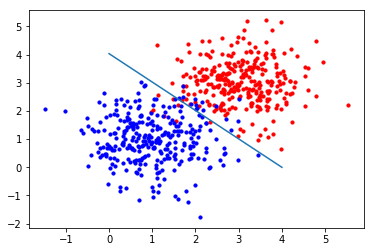

In [33]:
ax.plot(x_, x_ * slope + inter)
fig